# Objective:
- To extract key financial data for the last three fiscal years from the 10-K filings of Microsoft, Tesla, and Apple. 
- To analyze this data, focusing on trends and insights that could inform the development of an AI-powered financial chatbot.



# Importing Packages

In [ ]:
import pandas as pd
from sec_data_fetcher import get_company_cik, get_latest_10k_filings, extract_financial_data
from datetime import datetime
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Data Extraction

In [7]:
# Defining the companies with their tickers and names
companies = {
    'MSFT': 'Microsoft',
    'TSLA': 'Tesla',
    'AAPL': 'Apple'
}

all_data = []

for ticker, company_name in companies.items():
    cik = get_company_cik(ticker)
    if cik:
        logging.info(f"Processing {company_name} (CIK: {cik})")
        filings = get_latest_10k_filings(cik, count=3)
        if filings:
            for filing in filings:
                filing_date = filing['filing_date']
                try:
                    # Extract the fiscal year from the filing date
                    filing_year = datetime.strptime(filing_date, '%Y-%m-%d').year
                    logging.info(f"Extracting data for {company_name} - Year {filing_year}")
                except ValueError:
                    logging.error(f"Invalid filing date format for {company_name}: {filing_date}")
                    continue
                
                financial_data = extract_financial_data(cik, filing_year)
                
                # Check if financial data was successfully extracted
                if any(value is not None for value in financial_data.values()):
                    all_data.append({
                        'Company': company_name,
                        'Year': filing_year,
                        'Total Revenue': financial_data.get('Revenue'),
                        'Net Income': financial_data.get('Net Income'),
                        'Total Assets': financial_data.get('Total Assets'),
                        'Total Liabilities': financial_data.get('Total Liabilities'),
                        'Cash Flow': financial_data.get('Cash Flow')
                    })
                    logging.info(f"Data extracted successfully for {company_name} - Year {filing_year}")
                else:
                    logging.warning(f"No financial data found for {company_name} in {filing_year}")
        else:
            logging.warning(f"No 10-K filings found for {company_name}")
    else:
        logging.error(f"CIK not found for {company_name}")

# Create a DataFrame from the aggregated data
df = pd.DataFrame(all_data)

# Drop rows with missing Year to ensure data integrity
df.dropna(subset=['Year'], inplace=True)

# Convert financial metrics to numeric types
financial_metrics = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cash Flow']
for metric in financial_metrics:
    df[metric] = pd.to_numeric(df[metric], errors='coerce')

# Sort the DataFrame by Company and Year in descending order
df.sort_values(by=['Company', 'Year'], ascending=[True, False], inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Optional: Format numbers with commas for display purposes
# Note: This converts numeric columns to strings with commas
df_formatted = df.copy()
for metric in financial_metrics:
    df_formatted[metric] = df_formatted[metric].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else 'N/A')

# Save the formatted DataFrame to a CSV file
df_formatted.to_csv('financial_data.csv', index=False)

logging.info("Financial data has been saved to 'financial_data.csv'")

# Display the first few rows of the DataFrame
print(df.head())

2024-09-21 19:33:42,074 - INFO - Processing Microsoft (CIK: 0000789019)
2024-09-21 19:33:43,277 - INFO - Extracting data for Microsoft - Year 2024
2024-09-21 19:33:44,053 - INFO - Found Revenue data using RevenueFromContractWithCustomerExcludingAssessedTax: 180395000000
2024-09-21 19:33:44,053 - INFO - Found Net Income data using NetIncomeLoss: 66100000000
2024-09-21 19:33:44,053 - INFO - Found Total Assets data using Assets: 484275000000
2024-09-21 19:33:44,060 - INFO - Found Total Liabilities data using Liabilities: 231123000000
2024-09-21 19:33:44,060 - INFO - Found Cash Flow data using NetCashProvidedByUsedInOperatingActivities: 81353000000
2024-09-21 19:33:44,060 - INFO - Data extracted successfully for Microsoft - Year 2024
2024-09-21 19:33:44,066 - INFO - Extracting data for Microsoft - Year 2023
2024-09-21 19:33:44,775 - INFO - Found Revenue data using RevenueFromContractWithCustomerExcludingAssessedTax: 155726000000
2024-09-21 19:33:44,775 - INFO - Found Net Income data using 

     Company  Year  Total Revenue   Net Income  Total Assets  \
0      Apple  2023   211990000000  54158000000  332160000000   
1      Apple  2022   221223000000  59640000000  350662000000   
2      Apple  2021   201023000000  52385000000  337158000000   
3  Microsoft  2024   180395000000  66100000000  484275000000   
4  Microsoft  2023   155726000000  52280000000  380088000000   

   Total Liabilities    Cash Flow  
0       270002000000  62565000000  
1       283263000000  75132000000  
2       267980000000  62744000000  
3       231123000000  81353000000  
4       185405000000  58812000000  


In [8]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
0,Apple,2023,211990000000,54158000000,332160000000,270002000000,62565000000
1,Apple,2022,221223000000,59640000000,350662000000,283263000000,75132000000
2,Apple,2021,201023000000,52385000000,337158000000,267980000000,62744000000
3,Microsoft,2024,180395000000,66100000000,484275000000,231123000000,81353000000
4,Microsoft,2023,155726000000,52280000000,380088000000,185405000000,58812000000
5,Microsoft,2022,146405000000,55998000000,344607000000,181683000000,64406000000
6,Tesla,2024,21301000000,1129000000,109226000000,44046000000,242000000
7,Tesla,2023,23329000000,2513000000,86833000000,37598000000,2513000000
8,Tesla,2022,18756000000,3318000000,66038000000,30632000000,3995000000


In [2]:
df_formatted

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
0,Apple,2023,"211,990,000,000","54,158,000,000","332,160,000,000","270,002,000,000","62,565,000,000"
1,Apple,2022,"221,223,000,000","59,640,000,000","350,662,000,000","283,263,000,000","75,132,000,000"
2,Apple,2021,"201,023,000,000","52,385,000,000","337,158,000,000","267,980,000,000","62,744,000,000"
3,Microsoft,2024,"180,395,000,000","66,100,000,000","484,275,000,000","231,123,000,000","81,353,000,000"
4,Microsoft,2023,"155,726,000,000","52,280,000,000","380,088,000,000","185,405,000,000","58,812,000,000"
5,Microsoft,2022,"146,405,000,000","55,998,000,000","344,607,000,000","181,683,000,000","64,406,000,000"
6,Tesla,2024,"21,301,000,000","1,129,000,000","109,226,000,000","44,046,000,000","242,000,000"
7,Tesla,2023,"23,329,000,000","2,513,000,000","86,833,000,000","37,598,000,000","2,513,000,000"
8,Tesla,2022,"18,756,000,000","3,318,000,000","66,038,000,000","30,632,000,000","3,995,000,000"


# Data Processing


In [9]:
df = df.sort_values(['Company','Year'],ascending=True).groupby('Company').head()
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow
2,Apple,2021,201023000000,52385000000,337158000000,267980000000,62744000000
1,Apple,2022,221223000000,59640000000,350662000000,283263000000,75132000000
0,Apple,2023,211990000000,54158000000,332160000000,270002000000,62565000000
5,Microsoft,2022,146405000000,55998000000,344607000000,181683000000,64406000000
4,Microsoft,2023,155726000000,52280000000,380088000000,185405000000,58812000000
3,Microsoft,2024,180395000000,66100000000,484275000000,231123000000,81353000000
8,Tesla,2022,18756000000,3318000000,66038000000,30632000000,3995000000
7,Tesla,2023,23329000000,2513000000,86833000000,37598000000,2513000000
6,Tesla,2024,21301000000,1129000000,109226000000,44046000000,242000000


In [11]:
import matplotlib.pyplot as plt

In [14]:
def analyze_trend(company, metric):
    company_data = df[df['Company'] == company]
    trend = company_data[metric].pct_change().mean()
    return f"{company}'s {metric} {'increased' if trend > 0 else 'decreased'} by an average of {abs(trend)*100:.2f}% year-over-year."

In [15]:
analyze_trend('Microsoft','Total Revenue')


"Microsoft's Total Revenue increased by an average of 11.10% year-over-year."

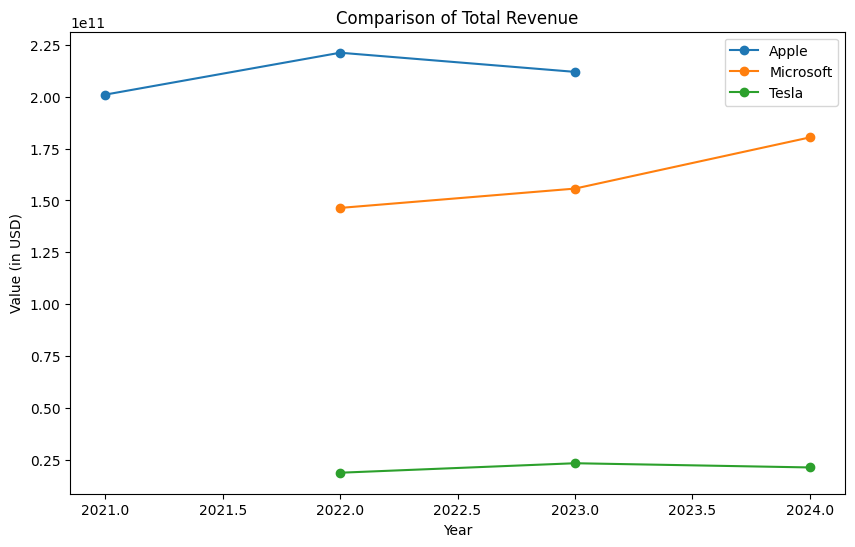

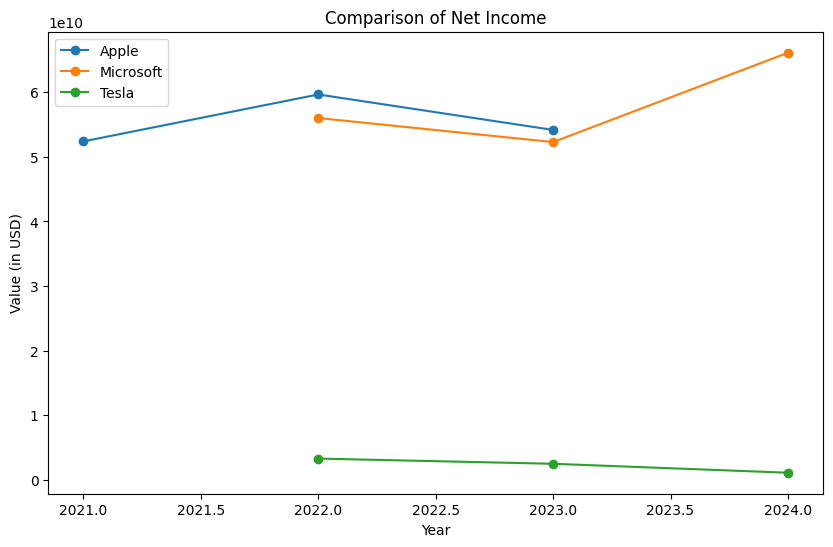

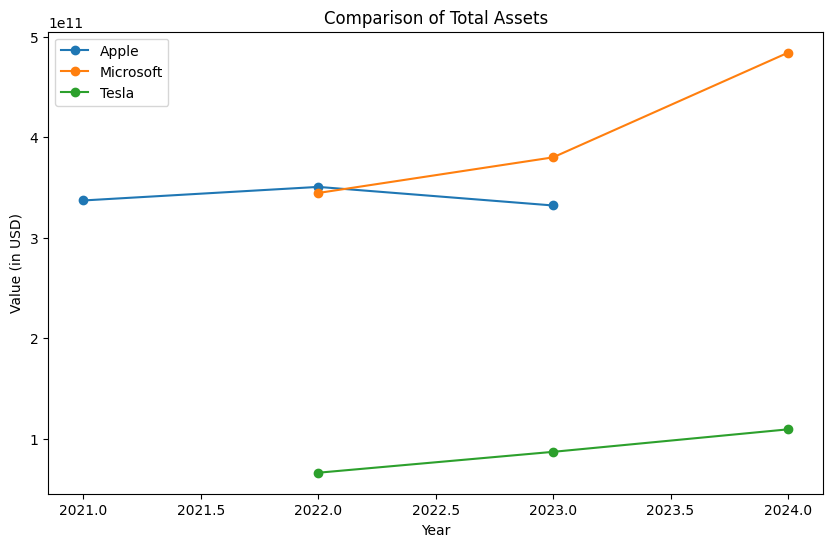

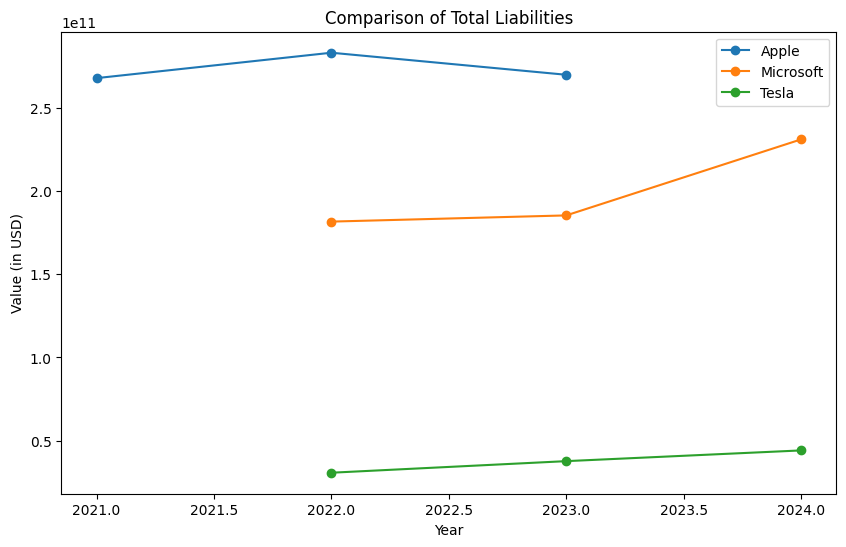

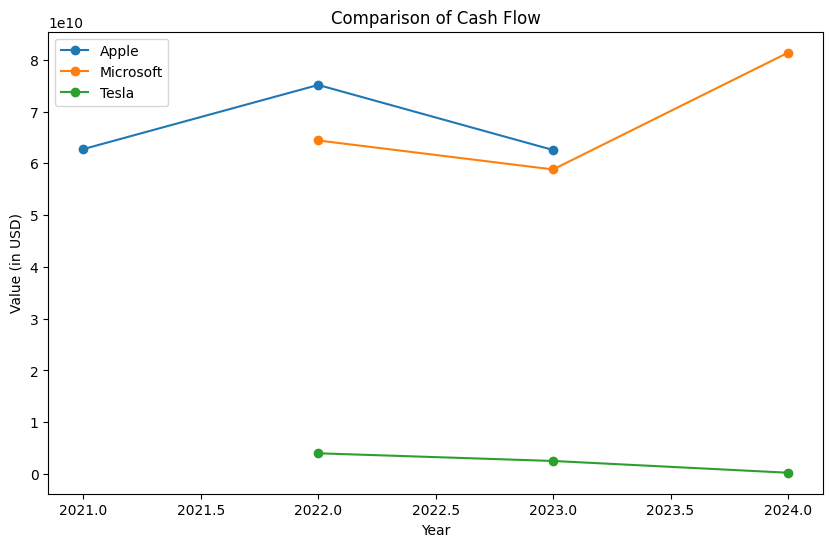

Financial Insights:
- Apple's Total Revenue increased by an average of 2.94% year-over-year.
- Apple's Net Income increased by an average of 2.33% year-over-year.
- Apple's Total Assets decreased by an average of 0.64% year-over-year.
- Apple's Total Liabilities increased by an average of 0.51% year-over-year.
- Apple's Cash Flow increased by an average of 1.51% year-over-year.
- Microsoft's Total Revenue increased by an average of 11.10% year-over-year.
- Microsoft's Net Income increased by an average of 9.90% year-over-year.
- Microsoft's Total Assets increased by an average of 18.85% year-over-year.
- Microsoft's Total Liabilities increased by an average of 13.35% year-over-year.
- Microsoft's Cash Flow increased by an average of 14.82% year-over-year.
- Tesla's Total Revenue increased by an average of 7.84% year-over-year.
- Tesla's Net Income decreased by an average of 39.67% year-over-year.
- Tesla's Total Assets increased by an average of 28.64% year-over-year.
- Tesla's Total L

In [28]:
def compare_companies(metric):
    plt.figure(figsize=(10, 6))
    for company in df['Company'].unique():
        company_data = df[df['Company'] == company]
        plt.plot(company_data['Year'], company_data[metric], marker='o', label=company)
    plt.title(f"Comparison of {metric}")
    plt.xlabel("Year")
    plt.ylabel("Value (in USD)")
    plt.legend()
    plt.show()

# Generate insights
insights = []
for company in df['Company'].unique():
    for metric in df.columns[2:]:  # Skip 'Company' and 'Year' columns
        insights.append(analyze_trend(company, metric))

# Compare companies
for metric in df.columns[2:]:  # Skip 'Company' and 'Year' columns
    compare_companies(metric)

# Print insights
print("Financial Insights:")
for insight in insights:
    print("- " + insight)

print("\nGraphs have been shown for each metric comparing the three companies.")

# Additional analysis: Profitability ratios
def calculate_profit_margin(company, year):
    company_year_data = df[(df['Company'] == company) & (df['Year'] == year)]
    if company_year_data.empty:
        return None
    revenue = company_year_data['Total Revenue'].values[0]
    net_income = company_year_data['Net Income'].values[0]
    return net_income / revenue if revenue != 0 else None

print("\nProfit Margins:")
for company in df['Company'].unique():
    for year in df['Year'].unique():
        profit_margin = calculate_profit_margin(company, year)
        if profit_margin is not None:
            print(f"{company} ({year}): {profit_margin:.2%}")
        else:
            print(f"{company} ({year}): Data not available")

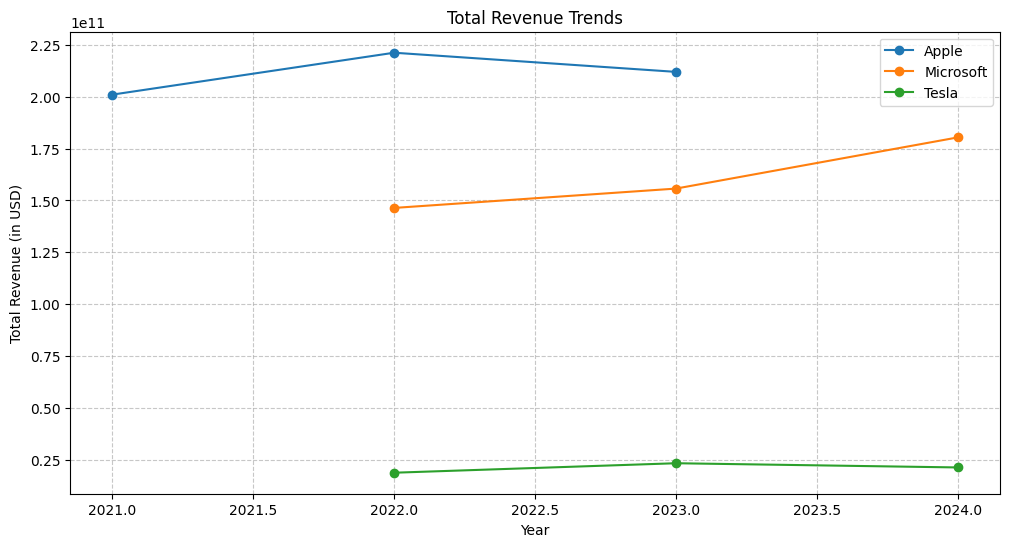

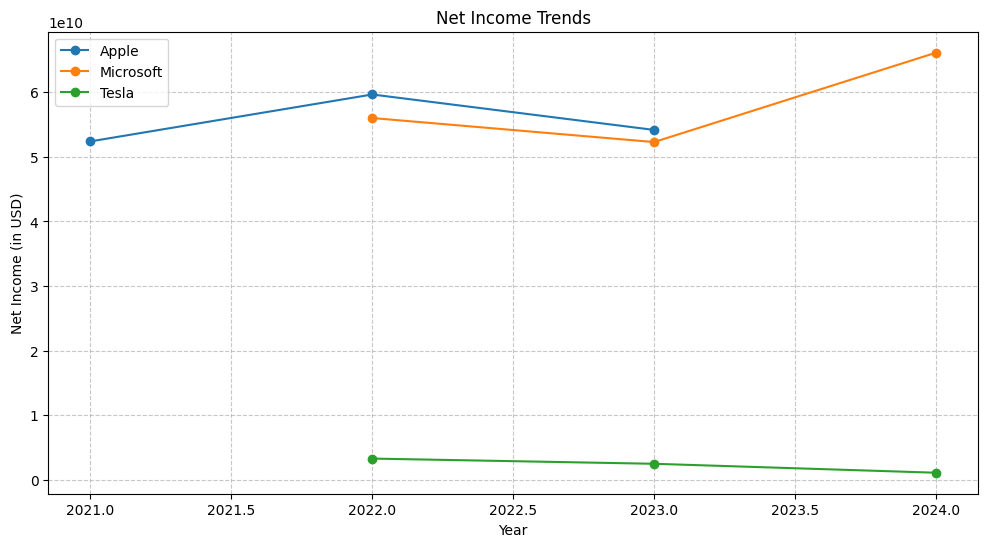

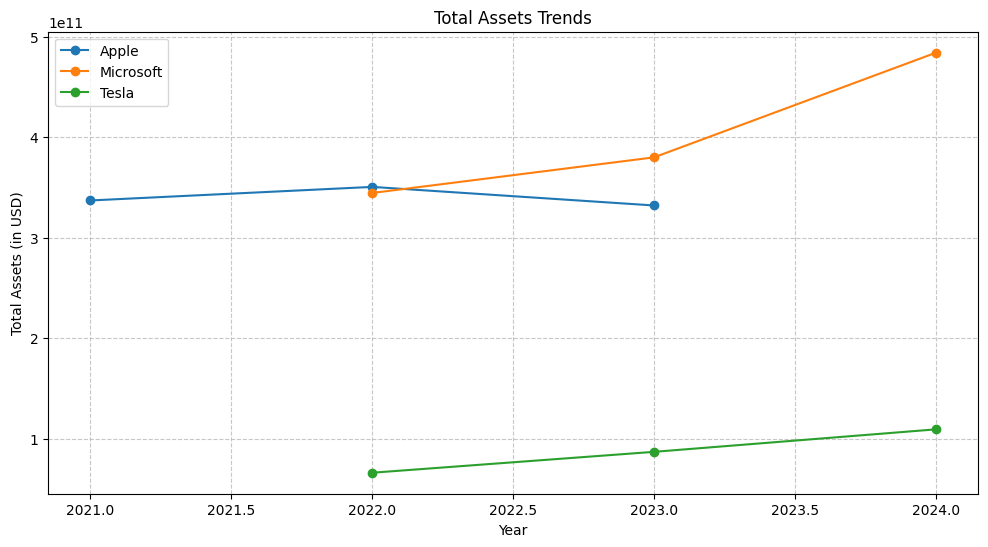

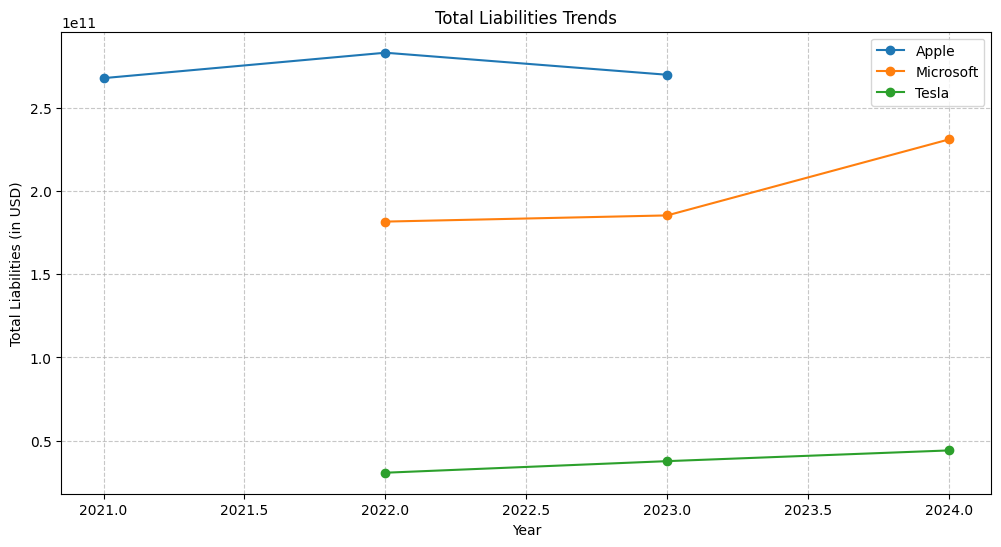

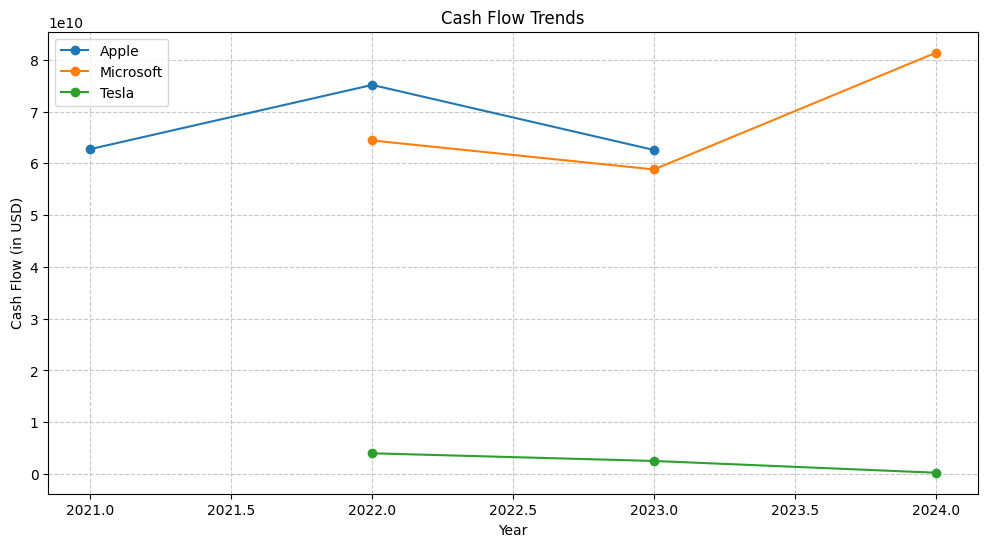

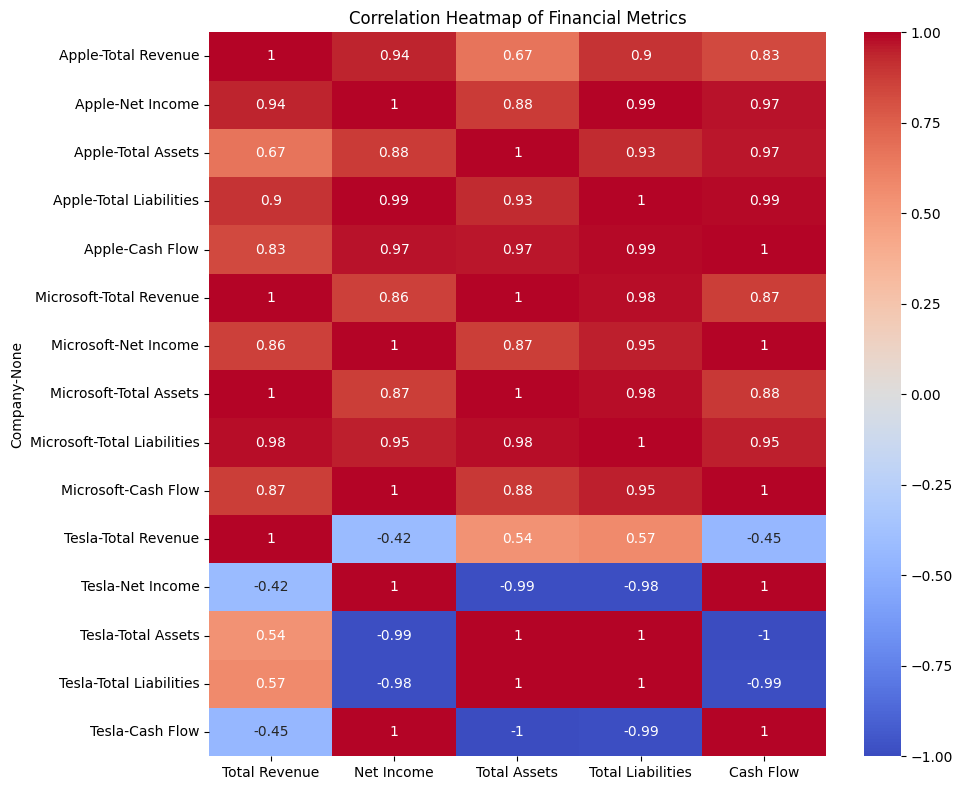

2024-09-21 20:24:34,897 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 20:24:35,002 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


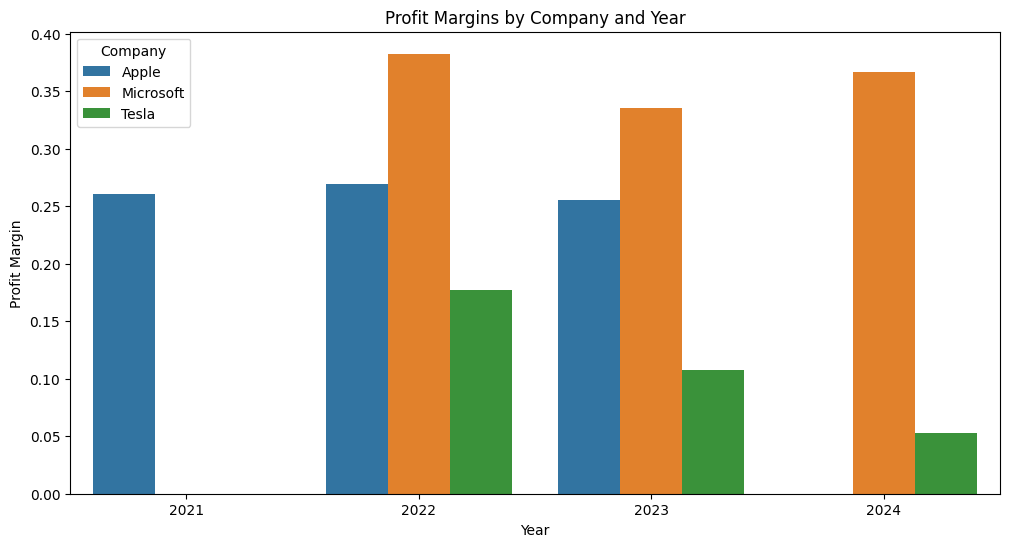


Charts have been displayed:
- Trend charts for each metric
- Correlation heatmap of financial metrics
- Bar plot of profit margins


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create line plots for each metric
def plot_metric_trends(metric):
    plt.figure(figsize=(12, 6))
    for company in df['Company'].unique():
        company_data = df[df['Company'] == company]
        plt.plot(company_data['Year'], company_data[metric], marker='o', label=company)
    plt.title(f"{metric} Trends")
    plt.xlabel("Year")
    plt.ylabel(f"{metric} (in USD)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Create line plots for each metric
for metric in df.columns[2:]:  # Skip 'Company' and 'Year' columns
    plot_metric_trends(metric)

# Function to create a heatmap of correlation between metrics
def plot_correlation_heatmap():
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.groupby('Company')[df.columns[2:]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title("Correlation Heatmap of Financial Metrics")
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap()

# Function to create a bar plot of profit margins
def plot_profit_margins():
    profit_margins = []
    for company in df['Company'].unique():
        for year in df['Year'].unique():
            margin = calculate_profit_margin(company, year)
            if margin is not None:
                profit_margins.append({'Company': company, 'Year': year, 'Profit Margin': margin})
    
    profit_margins_df = pd.DataFrame(profit_margins)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Year', y='Profit Margin', hue='Company', data=profit_margins_df)
    plt.title("Profit Margins by Company and Year")
    plt.xlabel("Year")
    plt.ylabel("Profit Margin")
    plt.legend(title="Company")
    plt.show()

plot_profit_margins()

In [22]:
plot_profit_margins()


2024-09-21 19:40:41,963 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2024-09-21 19:40:41,968 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
